# **Karamoja Food Security Analysis Project**

---



Author:

Winnie Awino Odoyo



#   **Problem Statement**

---


The Karamoja sub-region, commonly known as Karamoja, is a region in Uganda. The  region is famous for being the most food insecure region of Uganda, because of low productivity level of crops due to intense droughts as well as pests and diseases outbreaks.

Several NGO's like UNDP provide support though it has been very difficult due to lack of visibility and have to rely on local sources. DDI have developed a methodology to remotely measure the yield of Sorghum and Maize.  for the 2017 crop season. In liu of this, i have been tasked by the  DDI agri-tech team to create visualizations of the results of the first crop season.

# Data Understanding







Now that we know what is required of us, i first have to understand the data i am working with because without an understanding then i won't be able to solve anything.

### Importing libraries



To begin, we start by importing the relevant libraries

In [ ]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data from csv files

After importing the relevant libraries we ought to load our data

In [ ]:
# loading my  data
karamoja_dist = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
karamoja_sub= pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')


### Characteristics of the datasets

Now that our data is loaded, we have to know the basics of our data and understand it. We cannot proceed to prepare the data if we do not know its basics

In [ ]:
#To preview my data and its structures
#Previewing the karamoja district data
karamoja_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [ ]:
#To preview the Karamoja subcounty data
karamoja_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


From the results above, we are able to view different elements and characteristics of our datasets. The above information is important during data prepearation.

Now let us preview the first few rows to preview the contents of our datasets

In [ ]:
#To preview the first 5 rows
#To preview the first 5 rows of  karamoja district data
karamoja_dist.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
#To preview the first 5 rows of karamoja subcounty data
karamoja_sub.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


Before we forget, Let's check for the datatype

In [ ]:
# Checking for the datatype of our datasets

#Checking for the datatype of karamoja subcountiy data
type(karamoja_sub)


pandas.core.frame.DataFrame

In [ ]:
#Checking for the datatype of karamoja district data
type(karamoja_dist)

pandas.core.frame.DataFrame

From the results above, we see that our datasets are both pandas dataframes. Now we start preparing our data for visualization.

We also need to check the shape of our datasets

In [ ]:
# Checking the shape of the data
#To output the number of rows and columns in the karamoja subcounty data set
karamoja_sub.shape
print("There are {} rows and {} columns in the data set".format(karamoja_sub.shape[0],karamoja_sub.shape[1]))

There are 52 rows and 13 columns in the data set


In [ ]:
# Checking the shape of the data
#To output the number of rows and columns in the karamoja district data set
karamoja_dist.shape
print("There are {} rows and {} columns in the data set".format(karamoja_dist.shape[0],karamoja_dist.shape[1]))

There are 7 rows and 11 columns in the data set


# Data Preparation

Data preparation is an important step to any analytics as data unclean data may present limitations in visualizations and models

## Data Consistency

### Modifying  column names

In [ ]:
# To output column names of karamoja subcounty data
karamoja_sub.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [ ]:
# To output column names of karamoja district data
karamoja_dist.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

The column names were not consistent they were in mixed cases. So we decided to create uniformity and consistency in the column name cases for our data to be tidy

In [ ]:
#To change the case to a uniform case
# To output upper case in each column name word of karamja district  data
karamoja_dist.columns=karamoja_dist.columns.str.title()
karamoja_dist.columns

Index(['Objectid', 'Name', 'Pop', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [ ]:
#To change the case to a uniform case
# To output upper case in each column name word of karamja subcounty  data
karamoja_sub.columns=karamoja_sub.columns.str.title()
karamoja_sub.columns

Index(['Objectid', 'Subcounty_Name', 'District_Name', 'Pop', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

Phew! Now the column names looked tidy as they were made consistent

### Renaming column names

After that, we realised the naming of the Obectid column was different from the other columns in both datasets as it did not have a hyphen in between the name. So we sought to include it for uniformity

In [ ]:
#To edit the Objectid column name to Object_Id  in karamoja District data
rename_column_dist=karamoja_dist.rename(columns={'Objectid':'Object_Id'},inplace=True)
karamoja_dist.columns

Index(['Object_Id', 'Name', 'Pop', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [ ]:
#To edit the Objectid column name to Object_Id  in karamoja Subcounty Data
rename_column_sub=karamoja_sub.rename(columns={'Objectid':'Object_Id'},inplace=True)
karamoja_sub.columns

Index(['Object_Id', 'Subcounty_Name', 'District_Name', 'Pop', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

### Modifying Column values

We also realised from the data that there was a column name **Karamoja** in **karamoja District Data**  that was not quite clear. So we decided to replace the boolean column values(Y) with a more clear boolean value (True or False) for easy readability.





In [ ]:
#To convert the Karamoja boolean values from Y to True/False using lambda function
karamoja_sub['Karamoja']=karamoja_sub['Karamoja'].apply(lambda x: True if x=='Y' else False)
karamoja_sub.head(3)

,Object_Id,Subcounty_Name,District_Name,Pop,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,True,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,True,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,True,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268


To confirm whether the change had taken effect, we had to view the first few rows

## Data completeness

The completeness of data is very crucial to any analysis as incomplete data can compromise your analysis as some processes may be impossible to perform and your results will be inaccurate, biased or invaluable. It can limit our ability to do important things like;

*   Convert datatypes
*   Perform summary statistics
*   Visualize data

These were the reasons we needed to ensure the completeness of our data.

### Checking for null values

In [ ]:
#To check for null values in the data
#To check for null values in karamoja subcounty data
null_sub=karamoja_sub.isnull().sum()
null_sub

,0
Object_Id,0
Subcounty_Name,0
District_Name,0
Pop,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


From the above results, we see that there were no null values in Karamoja subcounty data

In [ ]:
#To check for null values in karamoja District data
null_dist=karamoja_dist.isnull().sum()
null_dist

,0
Object_Id,0
Name,0
Pop,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


There were also no null values in Karamoja District data.

### Checking for placeholder values in numerical data

Often, datasets will contain missing values that are denoted by a value that seems valid to pandas.This is what we call placeholder values. The values appear as unrealistic values. Any good placeholder value will be a value that couldn't show up in the real world.

Placeholder values  may cause analytical limitations in the following ways;


*   Creating visualizations
*   Model performance



In [ ]:
# Checking for placeholder values in  karamoja subcounty data


def check_placeholder_values(karamoja_sub, placeholders=None):
    """
    Checks for and prints placeholder values in numerical columns of a DataFrame.

    Parameters:
    karamoja_sub(pd.DataFrame): The DataFrame to check.
    placeholders (list or set, optional): A list or set of values to consider as placeholders. If None, defaults to NaN, inf, and -inf.
    """
    # Default placeholders are NaN, 0, and 0.0,9999
    if placeholders is None:
        placeholders ={0,0.9999,9999,np.NaN}

    # Loop over columns in the DataFrame that are of numerical type
    for column in karamoja_sub.select_dtypes(include=['float']).columns:
        # Extract the numerical column data
        col_data = karamoja_sub[column]

        # Check for each placeholder value
        for placeholder in placeholders:
            if placeholder is np.nan:
                # For NaN, use .isna() method
                placeholder_rows = col_data[col_data.isna()]
            else:
                # For other placeholders (9999,0 or custom values)
                placeholder_rows = col_data[col_data == placeholder]

            print(f"Column '{column}' has placeholder value '{placeholder}':")
            if not placeholder_rows.empty:
                print(placeholder_rows)
            else:
                print("No such placeholder values.")
            print()

# Example usage
# Create a sample DataFrame
data = {
    'A': [1.0, 2.5, np.nan, np.inf],
    'B': [np.nan, 2.5, -np.inf, 3.0],
    'C': ['foo', 'bar', 'baz', 'qux']  # Non-numerical column
}

df = pd.DataFrame(data)

# Call the function with default placeholders (NaN, inf, -inf)
check_placeholder_values(karamoja_sub)

# Call the function with custom placeholders
custom_placeholders = {np.nan, 9999, -9999, 0}
check_placeholder_values(karamoja_sub, placeholders=custom_placeholders)


Column 'S_Yield_Ha' has placeholder value '0':
No such placeholder values.

Column 'S_Yield_Ha' has placeholder value '0.9999':
No such placeholder values.

Column 'S_Yield_Ha' has placeholder value 'nan':
No such placeholder values.

Column 'S_Yield_Ha' has placeholder value '9999':
No such placeholder values.

Column 'M_Yield_Ha' has placeholder value '0':
33    0.0
Name: M_Yield_Ha, dtype: float64

Column 'M_Yield_Ha' has placeholder value '0.9999':
No such placeholder values.

Column 'M_Yield_Ha' has placeholder value 'nan':
No such placeholder values.

Column 'M_Yield_Ha' has placeholder value '9999':
No such placeholder values.

Column 'Crop_Area_Ha' has placeholder value '0':
No such placeholder values.

Column 'Crop_Area_Ha' has placeholder value '0.9999':
No such placeholder values.

Column 'Crop_Area_Ha' has placeholder value 'nan':
No such placeholder values.

Column 'Crop_Area_Ha' has placeholder value '9999':
No such placeholder values.

Column 'S_Area_Ha' has placeholder 

From the results above, the following intriguing observations are visible from Karamoja subcounty data;

*  All the columns concerning maize production have the placeholder value 0. i.e M_Yield_Ha, M_Area_Ha and M_Prod_Tot.
*   The columns concerning Sorghum production do not have any placeholder values.



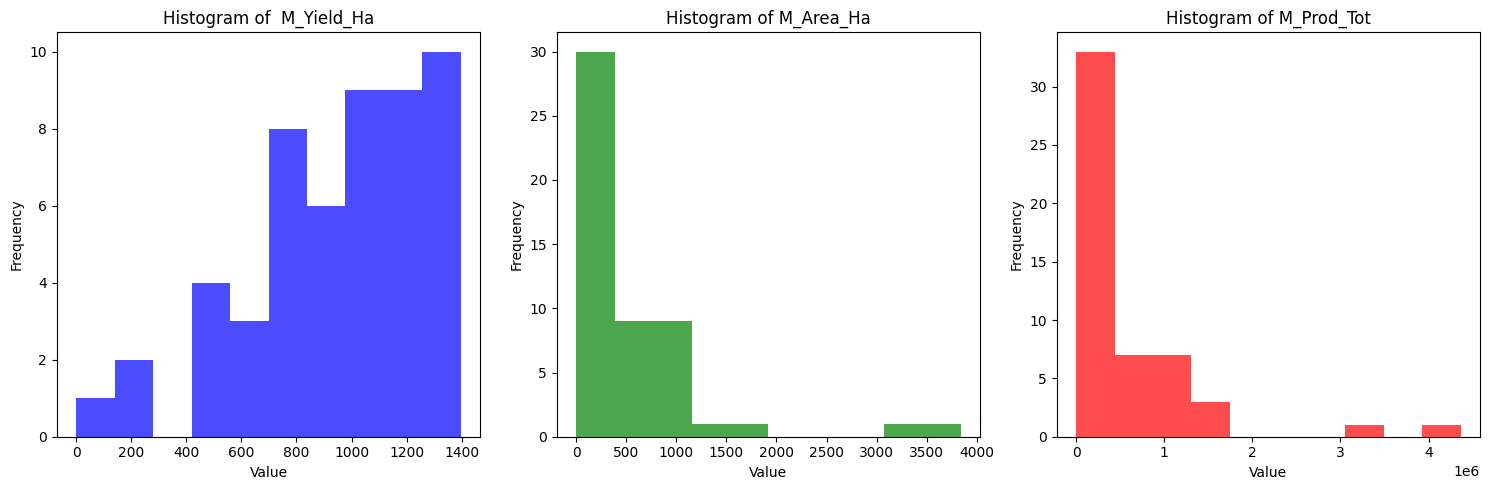

In [ ]:

#To plot a histogram of columns with placeholder values in karamoja subcounty data
# Create subplots:  3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for column 'M_Yield_Ha'
axs[0].hist(karamoja_sub['M_Yield_Ha'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Histogram of  M_Yield_Ha')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot histogram for column 'M_Area_Ha'
axs[1].hist(karamoja_sub['M_Area_Ha'], bins=10, color='green', alpha=0.7)
axs[1].set_title('Histogram of M_Area_Ha')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

# Plot histogram for column 'M_Prod_Tot'
axs[2].hist(karamoja_sub['M_Prod_Tot'], bins=10, color='red', alpha=0.7)
axs[2].set_title('Histogram of M_Prod_Tot')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


From the histogram we cold see that the data in **M_Yield_Ha** Column is **negatively skewed**  while the data in **M_Area_Ha and M_Prod_Tot** columns are both **positively skewed**. This means we could only replace the missing values with the median and not the mean because mean is used to replace normal distributions.

However, we realised the placeholder values 0 were  a realistic real world scenario and would potentially form a valid observation and analysis hence we saw no need to replace or remove the values.

## Data Accuracy

### Checking for Duplicates

We check for duplicates to ensure there is accuracy in the data.

In [ ]:
#To output the total  number of duplicate values
#To output the total number of duplicate values in   karamoja subcounty data
duplicate_sub=karamoja_sub.duplicated().sum()
duplicate_sub

0

There are no duplicates in Karamoja subcounty data.

In [ ]:
#To output the total number of duplicate values in  karamoja district data
duplicate_dist=karamoja_sub.duplicated().sum()
duplicate_dist

0

There are also no duplicates in the Karamoja District data

### Summary statistics


Obtaining summary staatistics of the dataset is also quite important. We intend to split the dataset into subgroups to see if we can notice any trends. We'll use the `groupby()` method to aggregate the data. This aggregate function will help us compare subsets of our data.










In [ ]:
# To group the population by subcounty names  sorting from highest to lowest in karamoja subcounty data
#To inform the  Subcounty with the highest Population
group_sub=karamoja_sub.groupby('Subcounty_Name').sum().sort_values('Pop',ascending=False).head(3)
group_sub

,Object_Id,District_Name,Pop,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
Subcounty_Name,,,,,,,,,,,,
LOLELIA,601,KAABONG,100919,1069331387,1,285.213427,1273.397362,2700.676313,2039.327583,656.586397,5.816436e+05,836095.3853
KALAPATA,594,KAABONG,99203,223116860,1,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,209806.0970
PANYANGARA,267,KOTIDO,65704,880955930,1,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.5114


From the results above, we quickly notice that **Lolelia Subcounty** of **Kaabong District** has the highest population.

In [ ]:
# To group the District names by Total Productivity of Sorghum and  in karamoja district data
#To inform the District name with the highest Total productivity of Sorghum
group_dist=karamoja_dist.groupby('Name').sum().sort_values('S_Prod_Tot',ascending=False).head(3)
group_dist


,Object_Id,Pop,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
Name,,,,,,,,,,
KOTIDO,85,243157,3641539808,331,1148,53032.64945,50247.44390,1751.372284,16631904,2010575
NAKAPIRIPIRIT,54,146780,4216323900,356,1264,26372.69849,19237.33321,6425.788414,6848491,8122197
KAABONG,20,627057,7373606003,279,945,28121.67253,20544.19496,7394.416334,5731830,6987723


In [ ]:
#To inform the District name with the highest Total productivity of Maize
group_dist2=karamoja_dist.groupby('Name').sum().sort_values('M_Prod_Tot',ascending=False).head(3)
group_dist2

,Object_Id,Pop,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
Name,,,,,,,,,,
NAKAPIRIPIRIT,54,146780,4216323900,356,1264,26372.69849,19237.33321,6425.788414,6848491,8122197
KAABONG,20,627057,7373606003,279,945,28121.67253,20544.19496,7394.416334,5731830,6987723
NAPAK,80,167625,4508782023,137,854,22944.29602,16142.01588,6543.719066,2211456,5588336


It can be said from the results above that **Kotido District** has the highest Total Sorghum Productivity and **Nakapiripirit District** has the highest Total Maize Productivity.

### Exporting Data

After our data was cleaned we exported it

In [ ]:
#Saving our Datasets
karamoja_sub.to_csv('clean_karamoja_sub.csv',index=False)
karamoja_dist.to_csv('clean_karamoja_dist.csv',index=False)


In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Clean Data

In [ ]:
#Loading the clean data
new_karamoja_sub=pd.read_csv('/content/clean_karamoja_sub.csv')
new_karamoja_dist=pd.read_csv('/content/clean_karamoja_dist.csv')

### Merging the Data

The data required to be merged to begin the visualizations on Tableau to answer reseach questions

In [ ]:
#To merge the data from both tables
merged_data = pd.merge(new_karamoja_sub, new_karamoja_dist, left_on='District_Name', right_on='Name', suffixes=('_Sub', '_Dist'))
merged_data.head()

,Object_Id_Sub,Subcounty_Name,District_Name,Pop_Sub,Area_Sub,Karamoja,S_Yield_Ha_Sub,M_Yield_Ha_Sub,Crop_Area_Ha_Sub,S_Area_Ha_Sub,...,Name,Pop_Dist,Area_Dist,S_Yield_Ha_Dist,M_Yield_Ha_Dist,Crop_Area_Ha_Dist,S_Area_Ha_Dist,M_Area_Ha_Dist,S_Prod_Tot_Dist,M_Prod_Tot_Dist
0,263,KACHERI,KOTIDO,17244,1067176155,True,354.207411,1137.467019,7023.533691,6434.342449,...,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
1,264,KOTIDO,KOTIDO,52771,597575188,True,367.890523,1162.996687,13587.990760,12455.592640,...,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,True,369.314177,1167.005832,1656.531855,1520.322052,...,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,True,283.324569,852.366578,7087.823334,6761.488901,...,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
4,267,PANYANGARA,KOTIDO,65704,880955930,True,373.836926,1283.859882,10398.249390,10111.198130,...,KOTIDO,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575


In [ ]:
#To confirm that my merged data is accurate
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Object_Id_Sub      52 non-null     int64  
 1   Subcounty_Name     52 non-null     object 
 2   District_Name      52 non-null     object 
 3   Pop_Sub            52 non-null     int64  
 4   Area_Sub           52 non-null     int64  
 5   Karamoja           52 non-null     bool   
 6   S_Yield_Ha_Sub     52 non-null     float64
 7   M_Yield_Ha_Sub     52 non-null     float64
 8   Crop_Area_Ha_Sub   52 non-null     float64
 9   S_Area_Ha_Sub      52 non-null     float64
 10  M_Area_Ha_Sub      52 non-null     float64
 11  S_Prod_Tot_Sub     52 non-null     float64
 12  M_Prod_Tot_Sub     52 non-null     float64
 13  Object_Id_Dist     52 non-null     int64  
 14  Name               52 non-null     object 
 15  Pop_Dist           52 non-null     int64  
 16  Area_Dist          52 non-nu

After merging the data, we exported it for visualization on Tablean

In [ ]:
#Saving our Datasets
merged_data.to_csv('final_merged_karamoja_data.csv',index=False)


# Research Objectives

The agri-tech team required an interactive visualization tool of the results for this first crop season. The analysis would make it possible to develop a new food security monitoring tool to show visibility of the overall state of the region and offer reliable sources of information to guide decisions on matters prioritization of activities by NGOs giving technical support to the region’s farmers. The visualizations would be used as a first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.what What we sought to answer were:

*   To map out the Karamoja Subcounties with their respective population.
*   To compare the crop area (Ha) per crop in relation to the total crop area(Ha) and determine the different variations in crop areaof both Sorghum and Maize.
*   To determine the crop  productivity (Sorghum & Maize) in every District
*  To determine the average crop yield(Kg/Ha) per District
*  To determine the area that is not cultivated in each District
*   To determine the average Yield (Kg/Ha)per every crop growing Area(Ha)










TThe analysis was done on Tableau Public and the evaluation outcomes are from the results therein however, here is the link to the dashboard for reference;
[Tableau Dashboard](https://public.tableau.com/app/profile/winnie.odoyo/viz/KaramojaFoodSecurityAnalysisDashboard/KaramojaFoodSecurityDashboard?publish=yes)


# Data Evaluation

From the visualizations, the following analysis were made;



1.   From the map of Karamoja subcounties it was discovered that;

    *  Lolelia Subcounty has the highest population of 100,919 residents however it is not the Largest in size, the Largest in size is Rupa with a populatio of 41,493.

    *  Lolelia Subcounty is in Kaabong District which has a higher maize yield
 as compared to sorghum yield. The District also has a higher maize crop area than sorghum crop area.


2.   From the crop area/coverage in Ha it was discovered that;
  
    *   Sorghum has a generally larger crop Area as compared to Maize in each District. Abim ,Amudat and Moroto Districts have the lowest Total crop area and in return crop area  for each crop is also low.

    *   Kaabong District has the largest crop area. Kotido also has a large crop area,However, the maize crop area in Kotido is very low and is inproportionate to the total crop area while the sorghum crop area is very large **bold text**

3.  On the crop productivity per District, it was discovered that;

   *   Kaabong has the highest maize produce of 98M(Kg) while Moroto has the lowest maize produce of 3M(Kg)

   *   Kotido has the highest Sorghum Produce of 100M(Kg) while Amudat has the lowest Sorghum produce of 2M(Kg)

   *   Kotido has the highest Sorghum produce but among the lowest maize produce of 2M(kg)

4.   On the Average crop yield(Kg/Ha) , it was discovered that;

  *    Amudat has the highest Sorghum yield of 1297(Kg/Ha). It's sorghum yield is higher than the maize yield despite the fact that maize has a smaller crop area/coverage than Sorghum in the region. The total population of Amudat is 71,609. The actual yield is lower than the produce

  *   Moroto has the lowest Sorghum Yield of 128(kg/Ha) despite having a high sorghum crop area of 28,450(Ha). The maize Yield here is also higher than Sorghum Yield. The total produce is 3M(Kg) which is higher than the Sorghum produce in the region. The actual yield is lower than the produce


5.   From the Average yield of Sorghum per Crop coverage in Districts, it was discovered that;

  *   Amudat District has the highest Average yield of Sorghum by Crop Area, with a yeild of 205 on a crop coverage of 11M(Ha). The Maize produce is higher than the Sorghum produce and the maize yield is higher than the sorgum yield.

 *   The Sorghum  average yield per crop coverage  is lower however, the Sorghum Produce is higher than the maize produce.





















# Conclusion and recommendations

The visualization of results provided in this study will provide more reliable and reusable information by DDI and NGOs like UNDP in making decisions on resource utilization and give an understanding of the overall state of Karamoja region on maize and sorghum productivity. They will also be able to deduce the factors that affect the productivity and yields of the region giving knowledge on how to improve the livelihood of the Karamoja community.

From the analysis, i would recommend the following;


*   The DDI team should figure out why the sorghum crop area is high and yet the produce and yield is low which is inpproportuionate to the crop area. So as to advice the NGOs on the way forward.
*   Because the crop yield of both Sorghum and Maize is generally lower than the productivity, DDi team should focus on discovering the factors that influence the yields like temperature, sunlight exposure, climate and soil fertilty
*  The DDI team should focus on ways to support the Districts with the lowest produce (Amudat and Moroto) yet relatively highly populated because this means that the produce does not sustain the community. They should also focus on the factors that are affecting the productivity of the areas.
*   The DDI agri-tech team should discover factors influencing the lower yields in sorghum than in maize. This is important so that the NGOs know where to focus their resources.







